In [4]:
from common import *

In [5]:
# load data
perf = pd.read_csv(ROC_PATH / 'DeepCoFFEA' / 'thresholds_loss0002.csv',
                   names=['th', 'tpr', 'fpr', 'prc'])
perf = perf.sort_values('th')
perf.loc[perf.shape[0]] = [100.00, 1.0, 1.0, 0.0]
perf = perf.reset_index(drop=True)
perf['Classifier'] = 'DeepCoFFEA'

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `reproduce_deepcoffea-crop.pdf'.


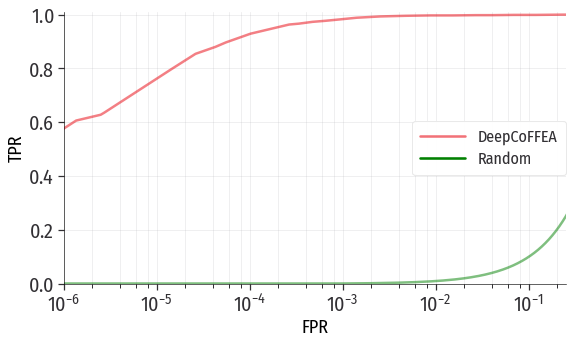

In [6]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

g = sns.lineplot(data=perf, x='fpr', y='tpr', hue='Classifier', legend='full', ci=None, palette=[red])

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
handles.insert(1, Line2D([0],[0], color="green",))
labels.insert(1, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         loc='best',
                         borderaxespad=0,
                         borderpad=0.5,
                         ncol=1)
g.add_artist(windows_leg)

save_fig('reproduce_deepcoffea')